<a href="https://colab.research.google.com/github/RaminTK/Chatham/blob/main/Chatham_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from copy import deepcopy as dc

In [142]:
head = ['U-N',	'LT-N',	'TH-N',	'RT-N',	'TOTAL-N',	'U-S',	'LT-S',	'TH-S',	'RT-S',	'TOTAL-S',	'U-E',	'LT-E',	'TH-E',	'RT-E',	'TOTAL-E',	'U-W',	'LT-W',	'TH-W',	'RT-W',	'TOTAL-W']
TMC = []
data = 'drive/MyDrive/Chatham/TMC.xlsx'
for i in range(1,17):
  if i == 5:
    continue
  TMC.append(pd.read_excel(data, sheet_name=str(i), index_col=0))

In [143]:
N = pd.concat([i.filter(like='TOTAL').iloc[:, 0] for i in TMC], axis = 1)
N.columns = list(range(1,16))
S = pd.concat([i.filter(like='TOTAL').iloc[:, 1] for i in TMC], axis = 1)
S.columns = list(range(1,16))
E = pd.concat([i.filter(like='TOTAL').iloc[:, 2] for i in TMC], axis = 1)
E.columns = list(range(1,16))
W = pd.concat([i.filter(like='TOTAL').iloc[:, 3] for i in TMC], axis = 1)
W.columns = list(range(1,16))

In [144]:
# # Prepare the data for the LSTM model
# def create_dataset(dataset, look_back=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset) - look_back):
#         a = dataset[i : (i + look_back), :]
#         dataX.append(a)
#         dataY.append(dataset[i + look_back, :])
#     return np.array(dataX), np.array(dataY)

# # Your DataFrame (df) with the traffic data should be loaded here

# # Set a random seed for reproducibility
# np.random.seed(42)
# df = TMC[0]
# # Convert the DataFrame to a NumPy array
# traffic_data = df.values.astype("int")

# # Initialize a list of scalers, one for each intersection
# scalers = [MinMaxScaler(feature_range=(0, 1)) for _ in range(traffic_data.shape[1])]

# # Scale the data to the range [0, 1] for LSTM, applying each scaler separately
# traffic_data_scaled = np.column_stack([scalers[i].fit_transform(traffic_data[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# # Split the data into train and test sets
# train_size = int(len(traffic_data_scaled) * 0.80)
# test_size = len(traffic_data_scaled) - train_size
# train, test = traffic_data_scaled[0:train_size, :], traffic_data_scaled[train_size:len(traffic_data_scaled), :]

# # Prepare the train and test datasets
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

# # Reshape the input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

# # Train the LSTM model
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, traffic_data.shape[1])))
# model.add(Dense(traffic_data.shape[1]))
# model.compile(loss="mean_squared_error", optimizer="adam")
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# # Make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

# # Invert the predictions back to the original scale, applying each scaler separately
# trainPredict = np.column_stack([scalers[i].inverse_transform(trainPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
# trainY = np.column_stack([scalers[i].inverse_transform(trainY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
# testPredict = np.column_stack([scalers[i].inverse_transform(testPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
# testY = np.column_stack([scalers[i].inverse_transform(testY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# # Calculate the root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
# testScore = np.sqrt(mean_squared_error(testY, testPredict))

# print("Train Score: %.2f RMSE" % trainScore)
# print("Test Score: %.2f RMSE" % testScore)


In [145]:
# pd.DataFrame(trainY,columns = head).astype(int)

In [146]:
# pd.DataFrame(np.ceil(trainPredict),columns = head).astype(int)

reading data

In [147]:
# data = 'drive/MyDrive/Chatham/data.xlsx'
# EB0 = pd.read_excel(data, sheet_name='EB')
# data2 = 'drive/MyDrive/Chatham/data.xlsx'
# WB0 = pd.read_excel(data2, sheet_name='WB')

# data = 'drive/MyDrive/Chatham/ATR.xlsx'
# EB1 = pd.read_excel(data, sheet_name='1EB',header = 1)
# EB1 = EB1[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(EB1.index[0]).set_index('time', drop=True)
# WB2 = pd.read_excel(data, sheet_name='2WB',header = 1)
# WB2 = WB2[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(WB2.index[0]).set_index('time', drop=True)
# EB3 = pd.read_excel(data, sheet_name='3EB',header = 1)
# EB3 = EB3[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(EB3.index[0]).set_index('time', drop=True)
# WB4 = pd.read_excel(data, sheet_name='4WB',header = 1)
# WB4 = WB4[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(WB4.index[0]).set_index('time', drop=True)
# EB5 = pd.read_excel(data, sheet_name='5EB',header = 1)
# EB5 = EB5[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(EB5.index[0]).set_index('time', drop=True)
# WB6 = pd.read_excel(data, sheet_name='6WB',header = 1)
# WB6 = WB6[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(WB6.index[0]).set_index('time', drop=True)
# EB8 = pd.read_excel(data, sheet_name='8EB',header = 1)
# EB8 = EB8[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(EB8.index[0]).set_index('time', drop=True)
# WB8 = pd.read_excel(data, sheet_name='8WB',header = 1)
# WB8 = WB8[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(WB8.index[0]).set_index('time', drop=True)
# EB9 = pd.read_excel(data, sheet_name='9EB',header = 1)
# EB9 = EB9[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(EB9.index[0]).set_index('time', drop=True)
# WB10 = pd.read_excel(data, sheet_name='10WB',header = 1)
# WB10 = WB10[['Unnamed: 0'	,'Tues',	'Wed',	'Thurs',	'Tues.1',	'Wed.1',	'Thurs.1']].rename(columns={'Unnamed: 0': 'time'}).drop(WB10.index[0]).set_index('time', drop=True)

In [148]:
S

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TIME,,,,,,,,,,,,,,,
1,42,0,13,0,0,33,53,36,0,51,18,0,40,17,1
2,48,0,18,0,0,42,48,43,0,50,70,0,50,18,0
3,49,0,30,0,0,61,54,92,0,59,56,0,59,19,4
4,70,0,30,0,0,47,68,107,0,56,70,0,49,16,1
5,63,0,30,0,0,42,84,52,0,85,41,0,54,30,1
6,77,0,19,0,0,54,54,59,0,54,66,0,70,19,3
7,85,0,33,0,0,63,89,36,0,61,61,0,55,31,6
8,79,0,26,0,0,41,59,36,0,70,63,0,53,12,2
9,53,0,23,0,0,33,36,40,0,55,32,0,45,18,2


In [149]:
# WB0.set_index('time', inplace=True)
# EB0.set_index('time', inplace=True)
# WB0

In [150]:
# red = 40
# green = 50
# saturation_flow = 2.5
Wcap = [43, 78, 90, 16, 14, 16, 27, 77, 95, 76, 94, 84, 12, 30, 63,1000]
Ecap = [1000, 43, 78, 90, 16, 14, 16, 27, 77, 95, 76, 94, 84, 12, 30, 63]

In [151]:
np.random.randint(low = 1, high=60*15, size=10)

array([426, 287,  90, 655,   9, 359, 471, 141, 191, 364])

In [152]:
cost_function(E,W,N,S,21, 31, 3,Ecap,Wcap)

426

In [162]:
def cost_function(E,W,N,S,red, green, saturation_flow,Ecap,Wcap):
  red_flaw = []
  cap_flaw = 0
  result = []
  for run in range(10):

    idx = E.index
    clm = E.columns
    # a = np.random.randint(low = 1, high=60*15, size=EB0[clm[0]][idx[0]])
    for j in range(E.shape[1]):
      temp = 0
      for i in range(E.shape[0]):
        a = np.random.randint(low = 1, high=60*15, size=E[clm[j]][idx[i]])
        LB = 0
        UB = 0
        total_time = 0
        while total_time < 900:
          total_time += (red + green)
          LB = UB
          UB = LB + red
          red_count = np.count_nonzero((a >= LB) & (a < UB)) + temp
          if red_count > Wcap[j]:
            cap_flaw += red_count - Wcap[j]
          red_saturaion = red_count * saturation_flow
          if red_saturaion > green:
            # print(clm[j], idx[i], (red_saturaion - green)/saturation_flow)
            temp = (red_saturaion - green)/saturation_flow
          else:
            temp = 0
          LB += red
          UB = LB + green
          # green_count = np.count_nonzero((a >= LB) & (a <= UB))
          red_flaw.append(temp)

    idx = W.index
    clm = W.columns
    # b = np.random.randint(low = 1, high=60*15, size=WB0[clm[0]][idx[0]])
    for j in range(W.shape[1]):
      temp = 0
      for i in range(W.shape[0]):
        b = np.random.randint(low = 1, high=60*15, size=W[clm[j]][idx[i]])
        LB = 0
        UB = 0
        total_time = 0
        while total_time < 900:
          total_time += (red + green)
          LB = UB
          UB = LB + red
          red_count = np.count_nonzero((b >= LB) & (b < UB))
          if red_count > Ecap[j]:
            cap_flaw += red_count - Ecap[j]
          red_saturaion = red_count * saturation_flow
          if red_saturaion > green:
            # print(clm[j], idx[i], (red_saturaion - green)/saturation_flow)
            temp = (red_saturaion - green)/saturation_flow
          else:
            temp = 0
          red_flaw.append(temp)
          LB += red
          UB = LB + green
          # green_count = np.count_nonzero((b >= LB) & (b <= UB))


    idx = S.index
    clm = S.columns
    # b = np.random.randint(low = 1, high=60*15, size=WB0[clm[0]][idx[0]])
    for j in range(S.shape[1]):
      temp = 0
      for i in range(S.shape[0]):
        if S[clm[j]][idx[i]] <= 0:
          continue
        c = np.random.randint(low = 1, high=60*15, size=S[clm[j]][idx[i]])
        LB = red
        UB = red
        total_time = 0
        while total_time < 900:
          total_time += (red + green)
          LB = UB
          UB = LB + green
          red_count = np.count_nonzero((c >= LB) & (c < UB))
          # if red_count > Ecap[j]:
          #   cap_flaw += red_count - Ecap[j]
          red_saturaion = red_count * saturation_flow
          if red_saturaion > red:
            # print(clm[j], idx[i], (red_saturaion - green)/saturation_flow)
            temp = (red_saturaion - red)/saturation_flow
          else:
            temp = 0
          red_flaw.append(temp)
          LB += green
          UB = LB + red
          # green_count = np.count_nonzero((c >= LB) & (c <= UB))

    idx = N.index
    clm = N.columns
    # b = np.random.randint(low = 1, high=60*15, size=WB0[clm[0]][idx[0]])
    for j in range(N.shape[1]):
      temp = 0
      for i in range(N.shape[0]):
        if N[clm[j]][idx[i]] <= 0:
          continue
        d = np.random.randint(low = 1, high=60*15, size=N[clm[j]][idx[i]])
        LB = red
        UB = red
        total_time = 0
        while total_time < 900:
          total_time += (red + green)
          LB = UB
          UB = LB + green
          red_count = np.count_nonzero((d >= LB) & (d < UB))
          # if red_count > Ecap[j]:
          #   cap_flaw += red_count - Ecap[j]
          red_saturaion = red_count * saturation_flow
          if red_saturaion > red:
            # print(clm[j], idx[i], (red_saturaion - green)/saturation_flow)
            temp = (red_saturaion - red)/saturation_flow
          else:
            temp = 0
          red_flaw.append(temp)
          LB += green
          UB = LB + red
          # green_count = np.count_nonzero((c >= LB) & (c <= UB))

    result.append(sum(red_flaw)+cap_flaw)
  return int(sum(result)/len(result))

In [169]:
# import random
# r,g = random.randint(20, 50),random.randint(20, 150)
# print(r,g)
cost_function(E,W,N,S,35, 65, 2.5,Ecap,Wcap)

209

In [197]:
np.exp((1000 - 2000)/10000)

0.9048374180359595

In [ ]:
history = []
new_red = random.randint(20, 120)
new_green = random.randint(40, 120)
saturation_flow = 2.5
temperature = 100
best_cost = 100000
while temperature > 0.1:

  new_red += random.randint(-np.ceil(temperature), np.ceil(temperature))
  if new_red <= 25:
    new_red = 26
  elif new_red >= 150:
    new_red = 149

  new_green += random.randint(-np.ceil(temperature), np.ceil(temperature))
  if new_green <= 35:
    new_green = 36
  elif new_green >= 150:
    new_green = 149

  cost = dc(cost_function(E,W,N,S,new_red, new_green, saturation_flow,Ecap,Wcap))
  if cost < best_cost:
    best_cost = dc(cost)
    red = dc(new_red)
    green = dc(new_green)
    print(red,green+3, best_cost+3)

  elif np.exp((best_cost - cost)/(temperature*1000)) > 0.9 :
    print('yes')
    best_cost = dc(cost)
    red = dc(new_red)
    green = dc(new_green)
    print(red+3,green+3, best_cost)

  temperature -= 1
  history.append([red+3,green+3, best_cost])
  # print(100 - temperature, '%')
  print(temperature)

In [246]:
history[-1]

[40, 67, 247]

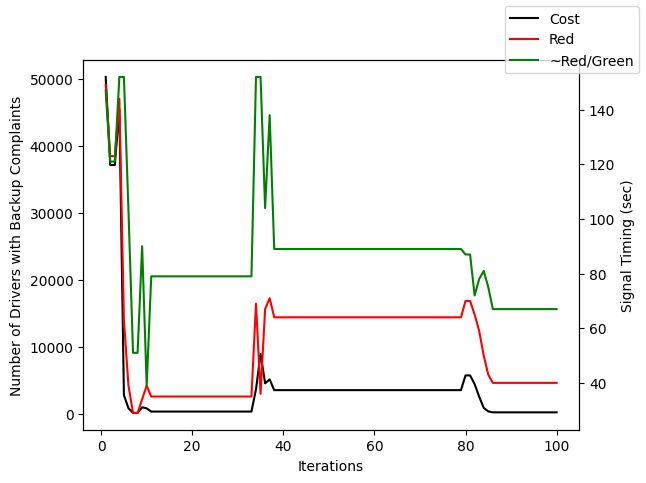

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = np.array(history)

# Create a new figure and add a subplot
fig, ax1 = plt.subplots()

# Create the x-axis data
x = np.arange(1, len(data) + 1)

# Plot the first and second column on the first y-axis
ax1.plot(x, data[:, 2], color='black', label='Cost')
ax1.set_ylabel('Number of Drivers with Backup Complaints')
ax1.set_xlabel('Iterations')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the third column on the second y-axis
ax2.plot(x, data[:, 0], color='red', label='Red')
ax2.plot(x, data[:, 1], color='green', label='~Red/Green')
ax2.set_ylabel('Signal Timing (sec)')

ax1.set_ylabel('Number of Drivers with Backup Complaints')

# Create a combined legend for both y-axes
fig.legend(loc='upper right')

# Show the plot
plt.show()


Main St Optimal Solution:

Red + all Red = 40 sec

Green + Yellow = 67 sec

CL = 106 sec

In [239]:
# new_red = 40
# for new_green in range(40,100):
#   print(cost_function(EB0,WB0,new_red, new_green, saturation_flow))

# cost_function(EB0,WB0,40, 80, saturation_flow)
np.random.choice([-1, 1])

-1

In [ ]:
best_cost,red,green

(452, 40, 66.5)

In [ ]:
cost_function(EB0,WB0,40, 40, saturation_flow)

960

In [ ]:
WB0

,time,TMC#1,TMC#2,TMC#3,TMC#4,TMC#5,TMC#6,TMC#7,TMC#8,TMC#9,TMC#10,TMC#11,TMC#12,TMC#13,TMC#14,TMC#15,TMC#16
0,7:00 ‐ 7:15,73,92,76,72,105,119,105,85,104,109,101,122,168,154,167,162
1,7:15 ‐ 7:30,81,103,79,76,144,172,132,122,121,141,141,159,208,167,178,192
2,7:30 ‐ 7:45,138,146,108,87,166,199,134,118,141,156,150,186,235,177,184,201
3,7:45 ‐ 8:00,157,198,138,132,203,233,185,159,163,144,147,199,209,189,157,193
4,8:00 ‐ 8:15,134,196,128,133,179,198,151,147,132,155,169,194,241,195,195,208
5,8:15 ‐ 8:30,109,175,106,122,197,228,160,129,142,178,160,191,235,193,196,222
6,8:30 ‐ 8:45,135,202,126,137,203,231,174,148,154,178,177,222,233,162,168,161
7,8:45 ‐ 9:00,114,182,106,127,195,224,165,139,120,160,184,240,220,195,196,200
8,9:00 ‐ 9:15,125,183,107,111,148,163,114,116,131,173,178,195,197,174,192,187
9,9:15 ‐ 9:30,103,127,95,97,136,152,135,112,125,145,165,188,188,178,171,180


In [ ]:
EB1

,Tues,Wed,Thurs,Tues.1,Wed.1,Thurs.1
time,,,,,,
0:00,13,11,9,5,8,9
0:15,2,5,5,5,5,9
0:30,5,4,4,1,3,4
0:45,4,4,7,3,3,6
1:00,1,6,2,3,6,7
...,...,...,...,...,...,...
22:45,17,16,21,17,15,13
23:00,17,15,17,21,16,15
23:15,12,9,18,7,15,15


In [ ]:
# len(df.values.reshape(-1, 1))
len(EB1.values.reshape(-1, 1)) - 2*96

# len(data[:432]),len(data[432:])

384

In [ ]:
data = EB1.values.reshape(-1, 1)

# Define look_back
# This is how many previous time steps the model will use for forecasting the next time step
look_back = 96  # As there are 96 quarter-hourly intervals in a day

# Split the data into train and test sets
# We'll use the first week's data for training and the second week's data for testing
train = data[:384]
test = data[384:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create datasets for training and testing
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])).astype('float32')
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1])).astype('float32')

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/5
287/287 - 3s - loss: 7849.0708 - 3s/epoch - 11ms/step
Epoch 2/5
287/287 - 0s - loss: 7623.0347 - 465ms/epoch - 2ms/step
Epoch 3/5
287/287 - 0s - loss: 7458.4292 - 456ms/epoch - 2ms/step
Epoch 4/5
287/287 - 0s - loss: 7301.1123 - 490ms/epoch - 2ms/step
Epoch 5/5
287/287 - 0s - loss: 7149.7373 - 481ms/epoch - 2ms/step
3/3 [==============================] - 0s 4ms/step


In [ ]:
# Calculate the root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore = np.sqrt(mean_squared_error(testY, testPredict))


print("Train Score: %.2f RMSE" % trainScore)
print("Test Score: %.2f RMSE" % testScore)

Train Score: 84.10 RMSE
Test Score: 26.80 RMSE


In [ ]:
# EB1.set_index('time', inplace=True)
EB1

,Tues,Wed,Thurs,Tues.1,Wed.1,Thurs.1
time,,,,,,
0:00,13,11,9,5,8,9
0:15,2,5,5,5,5,9
0:30,5,4,4,1,3,4
0:45,4,4,7,3,3,6
1:00,1,6,2,3,6,7
...,...,...,...,...,...,...
22:45,17,16,21,17,15,13
23:00,17,15,17,21,16,15
23:15,12,9,18,7,15,15


In [ ]:
df.set_index('time', inplace=True)
df

,TMC#1,TMC#2,TMC#3,TMC#4,TMC#5,TMC#6,TMC#7,TMC#8,TMC#9,TMC#10,TMC#11,TMC#12,TMC#13,TMC#14,TMC#15,TMC#16
time,,,,,,,,,,,,,,,,
7:00 ‐ 7:15,58,60,52,31,66,81,77,87,127,114,148,174,153,156,191,196
7:15 ‐ 7:30,99,116,75,39,94,117,109,120,142,142,200,200,182,195,218,220
7:30 ‐ 7:45,108,111,101,78,118,135,129,147,149,134,197,194,186,181,223,234
7:45 ‐ 8:00,110,94,89,58,101,119,111,121,180,172,198,234,190,201,244,251
8:00 ‐ 8:15,127,116,103,58,100,117,96,111,143,156,182,187,175,178,232,246
8:15 ‐ 8:30,127,116,94,70,111,128,105,102,139,121,160,185,177,172,207,214
8:30 ‐ 8:45,107,115,94,68,101,115,103,124,148,133,172,233,185,194,226,228
8:45 ‐ 9:00,121,129,94,54,95,112,104,111,146,163,191,201,199,205,251,246
9:00 ‐ 9:15,119,109,88,72,110,125,126,123,143,125,149,180,171,165,192,185


Visualization

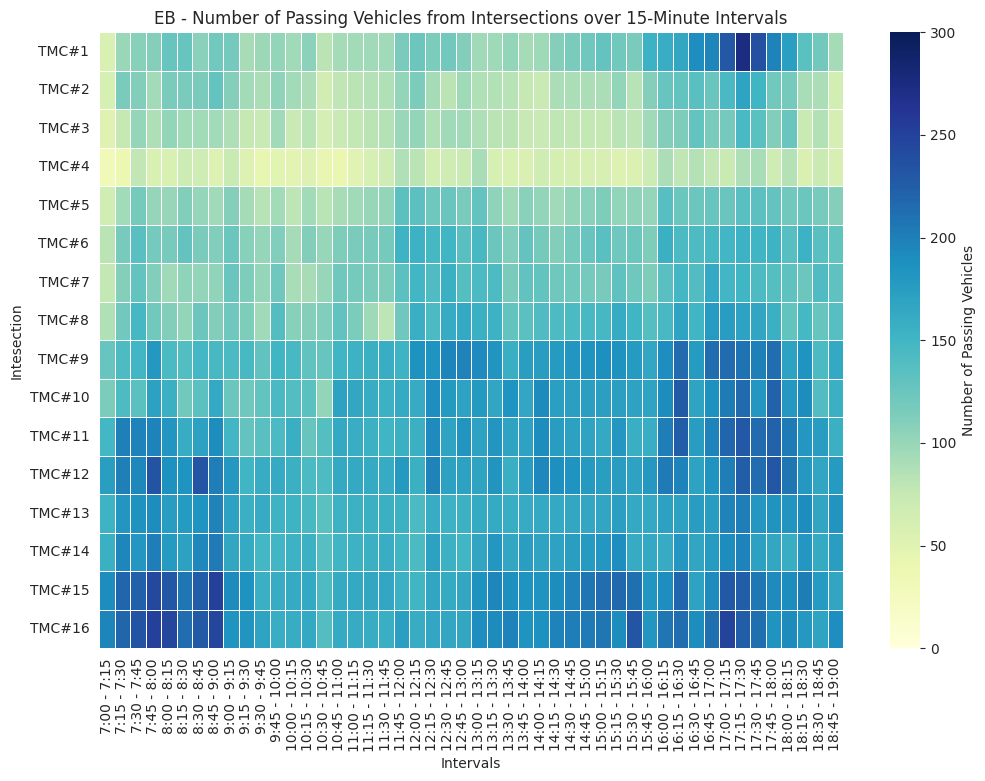

In [ ]:
# Transpose the DataFrame to have the street names as index and time intervals as columns
transposed_df = df.T


# Set up plot dimensions and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a heatmap using Seaborn's heatmap function
ax = sns.heatmap(
    transposed_df,
    cmap='YlGnBu',  # Choose a color map for the heatmap
    linewidths=0.5,
    annot=False,  # Display the number of cars in each cell
    fmt='d',  # Integer format for the cell annotations
    cbar_kws={'label': 'Number of Passing Vehicles'}, vmin=0, vmax=300
)

# Set plot title and labels
ax.set_title('EB - Number of Passing Vehicles from Intersections over 15-Minute Intervals')
ax.set_xlabel('Intervals')
ax.set_ylabel('Intesection')

# Rotate the y-axis labels (street names) for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

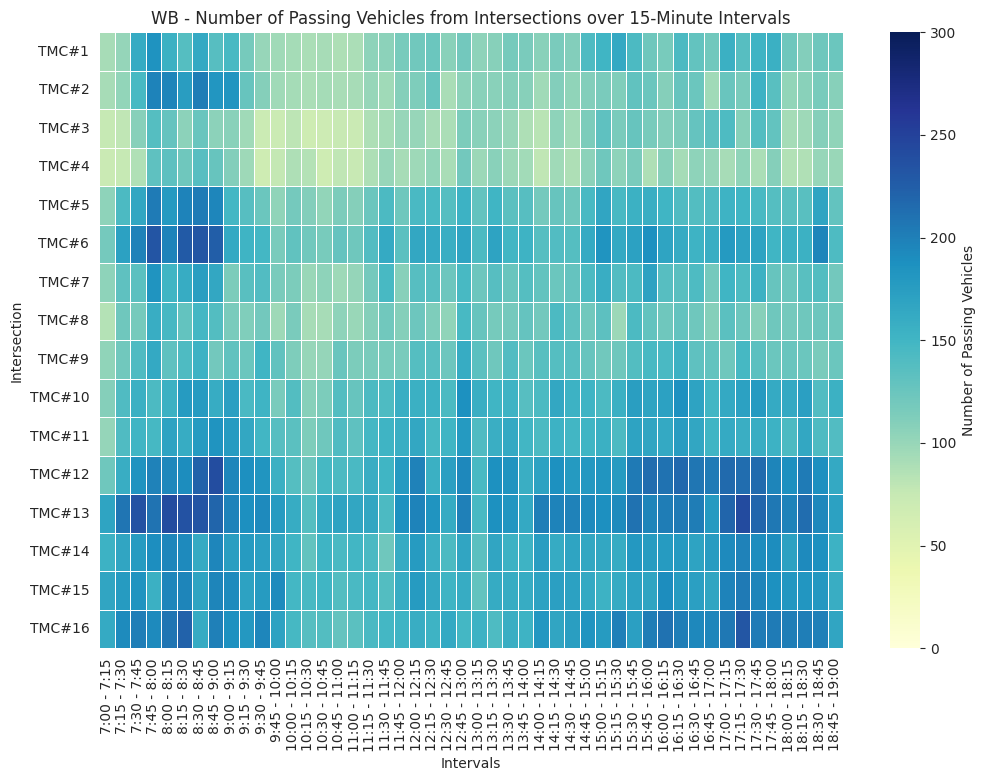

In [ ]:
# Transpose the DataFrame to have the street names as index and time intervals as columns
transposed_df = df2.T


# Set up plot dimensions and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a heatmap using Seaborn's heatmap function
ax = sns.heatmap(
    transposed_df,
    cmap='YlGnBu',  # Choose a color map for the heatmap
    linewidths=0.5,
    annot=False,  # Display the number of cars in each c//ell
    fmt='d',  # Integer format for the cell annotations
    cbar_kws={'label': 'Number of Passing Vehicles'}, vmin=0, vmax=300
)

# Set plot title and labels
ax.set_title('WB - Number of Passing Vehicles from Intersections over 15-Minute Intervals')
ax.set_xlabel('Intervals')
ax.set_ylabel('Intersection')

# Rotate the y-axis labels (street names) for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


OK

In [ ]:
SAW = [11.9, 14.3, 11.7, 6.9, 23.5, 30.0, 32.7, 24.3, 27.2, 13.7, 9.1, 10.9, 21.9, 29.5, 34.5, 41.1] # univ to danf
SMW = [30.7, 14.8, 7.6, 12.9, 19.9, 26.1, 32.1, 25.9, 16.8, 9.3, 9.3, 9.6, 11.6, 32.2, 37.4, 35.4]
SPW = [20.2, 10.8, 11.2, 7.6, 24.2, 21.6, 27.6, 21.0, 16.9, 10.3, 8.2, 12.2, 15.8, 24.6, 33.3, 38.9]

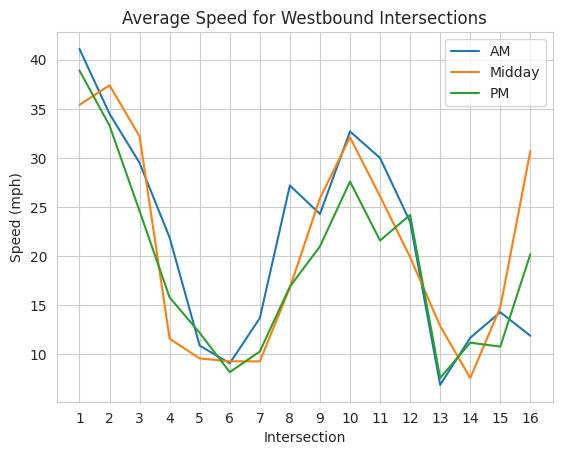

In [ ]:

# plt.figure(figsize=(12, 8))


SAW = [11.9, 14.3, 11.7, 6.9, 23.5, 30.0, 32.7, 24.3, 27.2, 13.7, 9.1, 10.9, 21.9, 29.5, 34.5, 41.1]
SMW = [30.7, 14.8, 7.6, 12.9, 19.9, 26.1, 32.1, 25.9, 16.8, 9.3, 9.3, 9.6, 11.6, 32.2, 37.4, 35.4]
SPW = [20.2, 10.8, 11.2, 7.6, 24.2, 21.6, 27.6, 21.0, 16.9, 10.3, 8.2, 12.2, 15.8, 24.6, 33.3, 38.9]

# Reorder the data
SAW = SAW[::-1]
SMW = SMW[::-1]
SPW = SPW[::-1]

plt.title('Average Speed for Westbound Intersections')

plt.plot(SAW, label='AM')
plt.plot(SMW, label='Midday')
plt.plot(SPW, label='PM')
plt.xticks(range(len(SAW)), range(1, len(SAW) + 1))
plt.xlabel('Intersection')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()

In [ ]:
SAE = [37.8, 40.9, 31.9, 39.0, 7.8, 19.6, 15.7, 13.4, 21.6, 30.1, 26.9, 24.2, 16.1, 15.2, 16.6, 19.8]
SME = [26.5, 31.9, 39.1, 33.7, 19.3, 10.6, 12.2, 15.0, 16.2, 27.2, 24.0, 25.9, 22.0, 9.4, 16.6, 23.0]
SPE = [41.4, 27.4, 33.5, 31.7, 18.3, 13.1, 11.7, 11.6, 15.9, 28.1, 21.4, 26.1, 13.2, 10.9, 13.2, 21.4]

average_list = [(a + b + c) / 3 for a, b, c in zip(SAE, SME, SPE)]

print(average_list)

[35.23333333333333, 33.4, 34.833333333333336, 34.800000000000004, 15.133333333333335, 14.433333333333335, 13.199999999999998, 13.333333333333334, 17.9, 28.46666666666667, 24.099999999999998, 25.399999999999995, 17.099999999999998, 11.833333333333334, 15.466666666666669, 21.399999999999995]


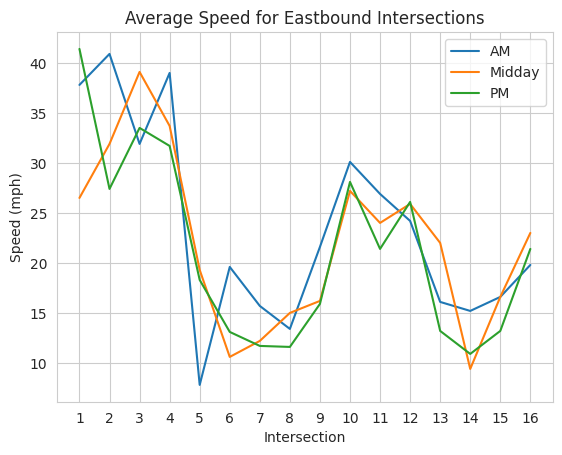

In [ ]:
# plt.figure(figsize=(12, 8))

SAE = [37.8, 40.9, 31.9, 39.0, 7.8, 19.6, 15.7, 13.4, 21.6, 30.1, 26.9, 24.2, 16.1, 15.2, 16.6, 19.8]
SME = [26.5, 31.9, 39.1, 33.7, 19.3, 10.6, 12.2, 15.0, 16.2, 27.2, 24.0, 25.9, 22.0, 9.4 ,16.6 ,23.0]
SPE = [41.4, 27.4, 33.5, 31.7, 18.3, 13.1, 11.7 ,11.6 ,15.9 ,28.1 ,21.4 ,26.1 ,13.2 ,10.9 ,13.2, 21.4]
plt.title('Average Speed for Eastbound Intersections')

plt.plot(SAE, label='AM')
plt.plot(SME, label='Midday')
plt.plot(SPE, label='PM')
plt.xticks(range(len(SAE)), range(1, len(SAE) + 1))
plt.xlabel('Intersection')
plt.ylabel('Speed (mph)')
plt.legend()
plt.show()

In [ ]:

# # Given data
# speed = average_list

# # data = df2

# hourly_flow_rates = shifted_df.astype(int) * 4

# # Calculate LOS ratios for each intersection at each interval
# LOS_intervals = hourly_flow_rates.divide(speed, axis=1)

# LOS_intervals

In [ ]:
# # Transpose the DataFrame to have the street names as index and time intervals as columns
# transposed_df = LOS_intervals.T


# # Set up plot dimensions and style
# plt.figure(figsize=(12, 8))
# sns.set_style('whitegrid')

# # Create a heatmap using Seaborn's heatmap function
# ax = sns.heatmap(
#     transposed_df,
#     cmap='YlGnBu',  # Choose a color map for the heatmap
#     linewidths=0.5,
#     annot=False,  # Display the number of cars in each cell
#     fmt='d',  # Integer format for the cell annotations
#     cbar_kws={'label': 'Number of Passing Vehicles'}, vmin=3, vmax=70
# )

# # Set plot title and labels
# ax.set_title('EB - LOS of Intersections over 15-minute Intervals')
# ax.set_xlabel('Interval')
# ax.set_ylabel('Intersection')

# # Rotate the y-axis labels (street names) for better readability
# plt.yticks(rotation=0)

# # Show the plot
# plt.show()


In [ ]:
# valh = LOS_intervals['TMC#14'].sum()/(48)
# vall = LOS_intervals['TMC#15'].sum()/(48)

# # LOS_intervals['TMC#14']

# ((valh - vall) / 2)/LOS_intervals['TMC#14'].sum()/(48)

In [ ]:
# LOS_intervals['TMC#14'] = LOS_intervals['TMC#14'] - (valh - vall)/2
# LOS_intervals['TMC#15'] = LOS_intervals['TMC#15'] + (valh - vall)/2

In [ ]:
# # Transpose the DataFrame to have the street names as index and time intervals as columns
# transposed_df = LOS_intervals.T


# # Set up plot dimensions and style
# plt.figure(figsize=(12, 8))
# sns.set_style('whitegrid')

# # Create a heatmap using Seaborn's heatmap function
# ax = sns.heatmap(
#     transposed_df,
#     cmap='YlGnBu',  # Choose a color map for the heatmap
#     linewidths=0.5,
#     annot=False,  # Display the number of cars in each cell
#     fmt='d',  # Integer format for the cell annotations
#     cbar_kws={'label': 'Number of Passing Cars'},vmin=3, vmax=70
# )

# # Set plot title and labels
# ax.set_title('EB - LOS of Intersections in 15-minute Intervals')
# ax.set_xlabel('Intervals')
# ax.set_ylabel('Intersections')

# # Rotate the y-axis labels (street names) for better readability
# plt.yticks(rotation=0)

# # Show the plot
# plt.show()


In [ ]:
# LOS_intervals['TMC#14'].sum(),LOS_intervals['TMC#15'].sum(),2550.6316172899465


In [ ]:

# # Given data
speed = [30.7, 14.8, 7.6, 12.9, 19.9, 26.1, 32.1, 25.9, 16.8, 9.3, 9.3, 9.6, 11.6, 32.2, 37.4, 35.4]

hourly_flow_rates = df2

# Calculate LOS ratios for each intersection at each interval
LOS_intervals = hourly_flow_rates.divide(speed, axis=1)

LOS_intervals

,TMC#1,TMC#2,TMC#3,TMC#4,TMC#5,TMC#6,TMC#7,TMC#8,TMC#9,TMC#10,TMC#11,TMC#12,TMC#13,TMC#14,TMC#15,TMC#16
time,,,,,,,,,,,,,,,,
7:00 ‐ 7:15,2.996743,6.216216,10.000000,5.581395,5.276382,4.559387,3.271028,3.281853,6.190476,11.720430,10.860215,12.708333,14.482759,4.782609,4.465241,4.576271
7:15 ‐ 7:30,3.289902,6.959459,10.394737,5.891473,7.236181,6.590038,4.112150,4.710425,7.202381,15.161290,15.161290,16.562500,17.931034,5.186335,4.759358,5.423729
7:30 ‐ 7:45,5.244300,9.864865,14.210526,6.744186,8.341709,7.624521,4.174455,4.555985,8.392857,16.774194,16.129032,19.375000,20.258621,5.496894,4.919786,5.677966
7:45 ‐ 8:00,6.058632,13.378378,18.157895,10.232558,10.201005,8.927203,5.763240,6.138996,9.702381,15.483871,15.806452,20.729167,18.017241,5.869565,4.197861,5.451977
8:00 ‐ 8:15,5.048860,13.243243,16.842105,10.310078,8.994975,7.586207,4.704050,5.675676,7.857143,16.666667,18.172043,20.208333,20.775862,6.055901,5.213904,5.875706
8:15 ‐ 8:30,4.495114,11.824324,13.947368,9.457364,9.899497,8.735632,4.984424,4.980695,8.452381,19.139785,17.204301,19.895833,20.258621,5.993789,5.240642,6.271186
8:30 ‐ 8:45,5.342020,13.648649,16.578947,10.620155,10.201005,8.850575,5.420561,5.714286,9.166667,19.139785,19.032258,23.125000,20.086207,5.031056,4.491979,4.548023
8:45 ‐ 9:00,4.429967,12.297297,13.947368,9.844961,9.798995,8.582375,5.140187,5.366795,7.142857,17.204301,19.784946,25.000000,18.965517,6.055901,5.240642,5.649718
9:00 ‐ 9:15,4.755700,12.364865,14.078947,8.604651,7.437186,6.245211,3.551402,4.478764,7.797619,18.602151,19.139785,20.312500,16.982759,5.403727,5.133690,5.282486


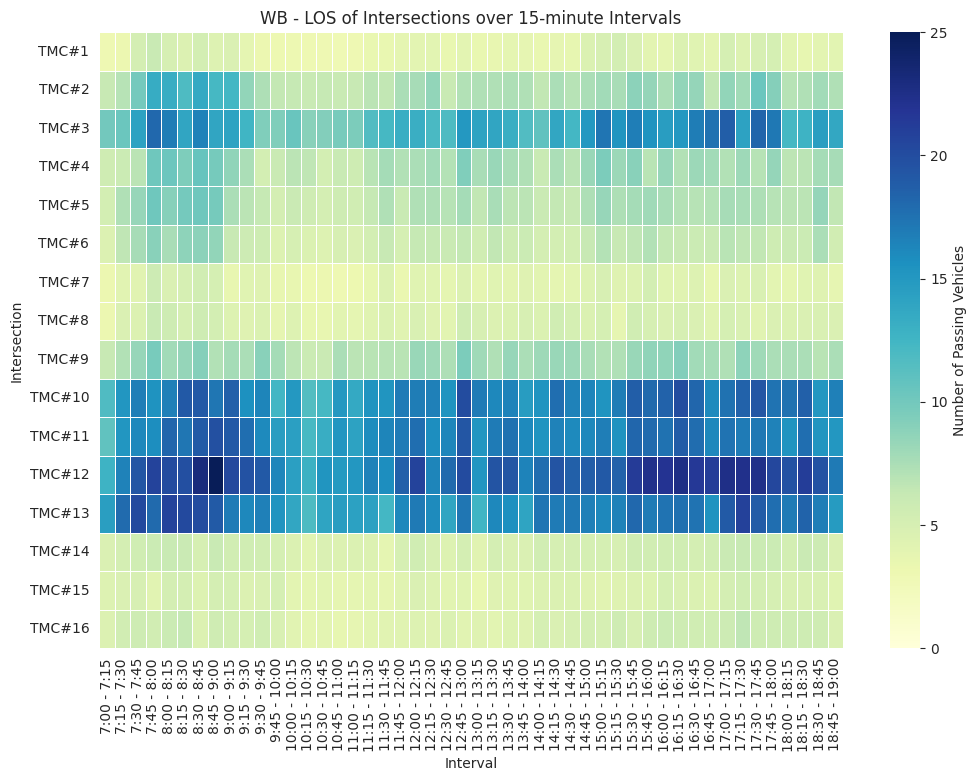

In [ ]:
# Transpose the DataFrame to have the street names as index and time intervals as columns
transposed_df = LOS_intervals.T


# Set up plot dimensions and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a heatmap using Seaborn's heatmap function
ax = sns.heatmap(
    transposed_df,
    cmap='YlGnBu',  # Choose a color map for the heatmap
    linewidths=0.5,
    annot=False,  # Display the number of cars in each cell
    fmt='d',  # Integer format for the cell annotations
    cbar_kws={'label': 'Number of Passing Vehicles'},vmin=0, vmax=25
)

# Set plot title and labels
ax.set_title('WB - LOS of Intersections over 15-minute Intervals')
ax.set_xlabel('Interval')
ax.set_ylabel('Intersection')

# Rotate the y-axis labels (street names) for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


EB prediction

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Prepare the data for the LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i : (i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# Set a random seed for reproducibility
np.random.seed(42)

# Convert the DataFrame to a NumPy array
traffic_data = df.values.astype("float32")

# Initialize a list of scalers, one for each intersection
scalers = [MinMaxScaler(feature_range=(0, 1)) for _ in range(traffic_data.shape[1])]

# Scale the data to the range [0, 1] for LSTM, applying each scaler separately
traffic_data_scaled = np.column_stack([scalers[i].fit_transform(traffic_data[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Split the data into train and test sets
train_size = int(len(traffic_data_scaled) * 0.80)
test_size = len(traffic_data_scaled) - train_size
train, test = traffic_data_scaled[0:train_size, :], traffic_data_scaled[train_size:len(traffic_data_scaled), :]

# Prepare the train and test datasets
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

# Train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, traffic_data.shape[1])))
model.add(Dense(traffic_data.shape[1]))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert the predictions back to the original scale, applying each scaler separately
trainPredict = np.column_stack([scalers[i].inverse_transform(trainPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
trainY = np.column_stack([scalers[i].inverse_transform(trainY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
testPredict = np.column_stack([scalers[i].inverse_transform(testPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
testY = np.column_stack([scalers[i].inverse_transform(testY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Calculate the root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore = np.sqrt(mean_squared_error(testY, testPredict))





print("Train Score: %.2f RMSE" % trainScore)
print("Test Score: %.2f RMSE" % testScore)


In [ ]:
# Make a prediction for the entire dataset
fullPredict = model.predict(np.reshape(traffic_data_scaled, (traffic_data_scaled.shape[0], 1, traffic_data_scaled.shape[1])))

# Invert the predictions back to the original scale, applying each scaler separately
fullPredict = np.column_stack([scalers[i].inverse_transform(fullPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Shift the original DataFrame down by one row
shifted_df = df.shift(periods=1)

# Replace the first row of the shifted DataFrame with the predicted values
shifted_df.iloc[0] = fullPredict[0]

# Set the index of the shifted DataFrame to match the original DataFrame
shifted_df.index = df.index

shifted_df
shifted_df = shifted_df.astype(int)

2/2 [==============================] - 0s 5ms/step


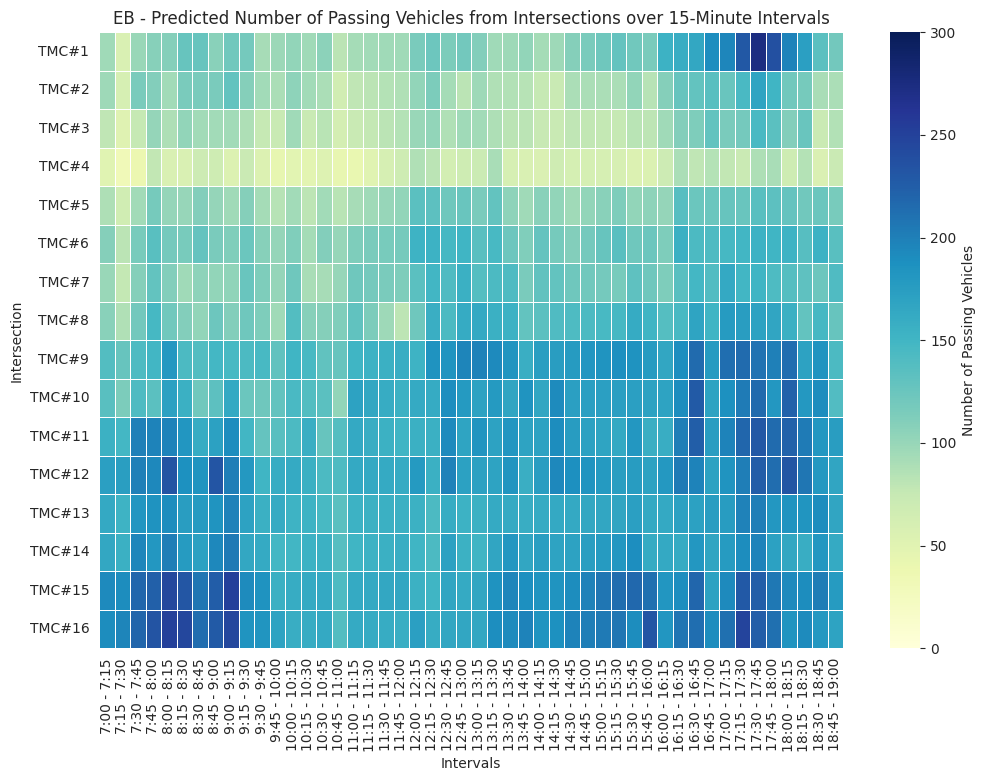

In [ ]:
# Transpose the DataFrame to have the street names as index and time intervals as columns
transposed_df = shifted_df.T


# Set up plot dimensions and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a heatmap using Seaborn's heatmap function
ax = sns.heatmap(
    transposed_df,
    cmap='YlGnBu',  # Choose a color map for the heatmap
    linewidths=0.5,
    annot=False,  # Display the number of cars in each cell
    fmt='d',  # Integer format for the cell annotations
    cbar_kws={'label': 'Number of Passing Vehicles'},vmin = 0, vmax = 300
)

# Set plot title and labels
ax.set_title('EB - Predicted Number of Passing Vehicles from Intersections over 15-Minute Intervals')
ax.set_xlabel('Intervals')
ax.set_ylabel('Intersection')

# Rotate the y-axis labels (street names) for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


WB prediction

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Prepare the data for the LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i : (i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# Your DataFrame (df) with the traffic data should be loaded here

# Set a random seed for reproducibility
np.random.seed(42)

# Convert the DataFrame to a NumPy array
traffic_data = df2.values.astype("float32")

# Initialize a list of scalers, one for each intersection
scalers = [MinMaxScaler(feature_range=(0, 1)) for _ in range(traffic_data.shape[1])]

# Scale the data to the range [0, 1] for LSTM, applying each scaler separately
traffic_data_scaled = np.column_stack([scalers[i].fit_transform(traffic_data[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Split the data into train and test sets
train_size = int(len(traffic_data_scaled) * 0.80)
test_size = len(traffic_data_scaled) - train_size
train, test = traffic_data_scaled[0:train_size, :], traffic_data_scaled[train_size:len(traffic_data_scaled), :]

# Prepare the train and test datasets
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

# Train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, traffic_data.shape[1])))
model.add(Dense(traffic_data.shape[1]))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert the predictions back to the original scale, applying each scaler separately
trainPredict = np.column_stack([scalers[i].inverse_transform(trainPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
trainY = np.column_stack([scalers[i].inverse_transform(trainY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
testPredict = np.column_stack([scalers[i].inverse_transform(testPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])
testY = np.column_stack([scalers[i].inverse_transform(testY[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Calculate the root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore = np.sqrt(mean_squared_error(testY, testPredict))





print("Train Score: %.2f RMSE" % trainScore)
print("Test Score: %.2f RMSE" % testScore)


Epoch 1/100
37/37 - 2s - loss: 0.2493 - 2s/epoch - 50ms/step
Epoch 2/100
37/37 - 0s - loss: 0.2001 - 76ms/epoch - 2ms/step
Epoch 3/100
37/37 - 0s - loss: 0.1461 - 80ms/epoch - 2ms/step
Epoch 4/100
37/37 - 0s - loss: 0.0982 - 67ms/epoch - 2ms/step
Epoch 5/100
37/37 - 0s - loss: 0.0682 - 78ms/epoch - 2ms/step
Epoch 6/100
37/37 - 0s - loss: 0.0532 - 67ms/epoch - 2ms/step
Epoch 7/100
37/37 - 0s - loss: 0.0454 - 65ms/epoch - 2ms/step
Epoch 8/100
37/37 - 0s - loss: 0.0417 - 66ms/epoch - 2ms/step
Epoch 9/100
37/37 - 0s - loss: 0.0401 - 66ms/epoch - 2ms/step
Epoch 10/100
37/37 - 0s - loss: 0.0387 - 68ms/epoch - 2ms/step
Epoch 11/100
37/37 - 0s - loss: 0.0379 - 67ms/epoch - 2ms/step
Epoch 12/100
37/37 - 0s - loss: 0.0376 - 66ms/epoch - 2ms/step
Epoch 13/100
37/37 - 0s - loss: 0.0373 - 66ms/epoch - 2ms/step
Epoch 14/100
37/37 - 0s - loss: 0.0369 - 67ms/epoch - 2ms/step
Epoch 15/100
37/37 - 0s - loss: 0.0368 - 80ms/epoch - 2ms/step
Epoch 16/100
37/37 - 0s - loss: 0.0365 - 78ms/epoch - 2ms/step
Ep

In [ ]:
# Make a prediction for the entire dataset
fullPredict = model.predict(np.reshape(traffic_data_scaled, (traffic_data_scaled.shape[0], 1, traffic_data_scaled.shape[1])))

# Invert the predictions back to the original scale, applying each scaler separately
fullPredict = np.column_stack([scalers[i].inverse_transform(fullPredict[:, i].reshape(-1, 1)) for i in range(traffic_data.shape[1])])

# Shift the original DataFrame down by one row
shifted_df = df.shift(periods=1)

# Replace the first row of the shifted DataFrame with the predicted values
shifted_df.iloc[0] = fullPredict[0]

# Set the index of the shifted DataFrame to match the original DataFrame
shifted_df.index = df2.index

shifted_df
shifted_df2 = shifted_df.astype(int)

2/2 [==============================] - 0s 5ms/step


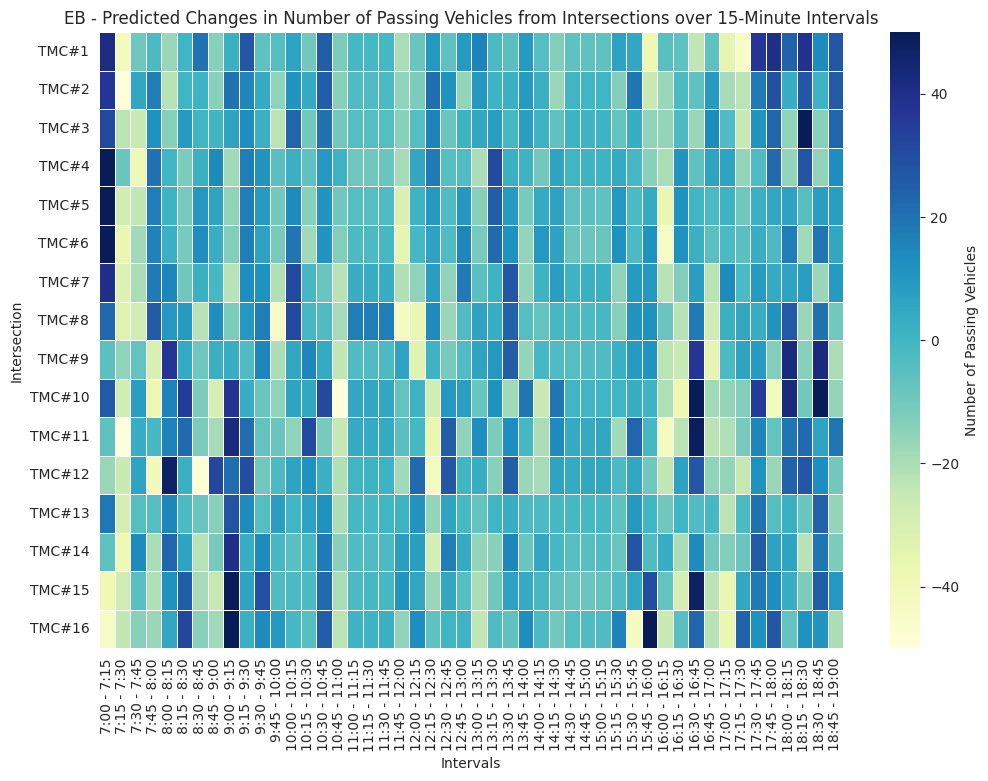

In [ ]:
# Transpose the DataFrame to have the street names as index and time intervals as columns
transposed_df = (shifted_df-df).T


# Set up plot dimensions and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a heatmap using Seaborn's heatmap function
ax = sns.heatmap(
    transposed_df,
    cmap='YlGnBu',  # Choose a color map for the heatmap
    linewidths=0.5,
    annot=False,  # Display the number of cars in each cell
    fmt='d',  # Integer format for the cell annotations
    cbar_kws={'label': 'Number of Passing Vehicles'},vmin = -50, vmax = +50
)

# Set plot title and labels
ax.set_title('EB - Predicted Changes in Number of Passing Vehicles from Intersections over 15-Minute Intervals')
ax.set_xlabel('Intervals')
ax.set_ylabel('Intersection')

# Rotate the y-axis labels (street names) for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [ ]:
import numpy as np

def los_cost_function(speed, passing_cars):
    los = np.array(passing_cars) / np.array(speed)
    return np.sum(los)

def generate_new_solution(current_cycle_lengths, min_cycle_length=60, max_cycle_length=120, step=5):
    new_cycle_lengths = current_cycle_lengths.copy()
    idx_to_change = np.random.randint(0, len(new_cycle_lengths))
    change = np.random.choice([-step, step])
    new_cycle_lengths[idx_to_change] = np.clip(new_cycle_lengths[idx_to_change] + change, min_cycle_length, max_cycle_length)
    return new_cycle_lengths

In [ ]:
def simulated_annealing(speed, passing_cars, initial_cycle_lengths, max_iter=1000, T_init=100, T_min=1e-3, alpha=0.9):
    current_cycle_lengths = initial_cycle_lengths.copy()
    current_cost = los_cost_function(speed, passing_cars)
    best_cycle_lengths = current_cycle_lengths.copy()
    best_cost = current_cost

    T = T_init
    i = 0

    while i < max_iter and T > T_min:
        new_cycle_lengths = generate_new_solution(current_cycle_lengths)
        new_cost = los_cost_function(speed, passing_cars)

        if new_cost < current_cost or np.random.rand() < np.exp((current_cost - new_cost) / T):
            current_cycle_lengths = new_cycle_lengths
            current_cost = new_cost

            if new_cost < best_cost:
                best_cycle_lengths = new_cycle_lengths
                best_cost = new_cost

        T *= alpha
        i += 1

    return best_cycle_lengths


In [ ]:
# Speeds for TMC#1 to 16
speed = [30.7, 14.8, 7.6, 12.9, 19.9, 26.1, 32.1, 25.9, 16.8, 9.3, 9.3, 9.6, 11.6, 32.2, 37.4, 35.4]


predicted_traffic_list = shifted_df2.values.tolist()

# Initial cycle lengths (90 seconds for all intersections)
initial_cycle_lengths = [90] * len(speed)

# Use simulated annealing to find the optimal cycle lengths
optimal_cycle_lengths = simulated_annealing(speed, predicted_traffic_list, initial_cycle_lengths)

print("Optimal cycle lengths:", optimal_cycle_lengths)


Optimal cycle lengths: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]


In [ ]:
df['TMC#14'].sum(),df['TMC#15'].sum(),df['TMC#13'].sum()

(8106, 9130, 8064)

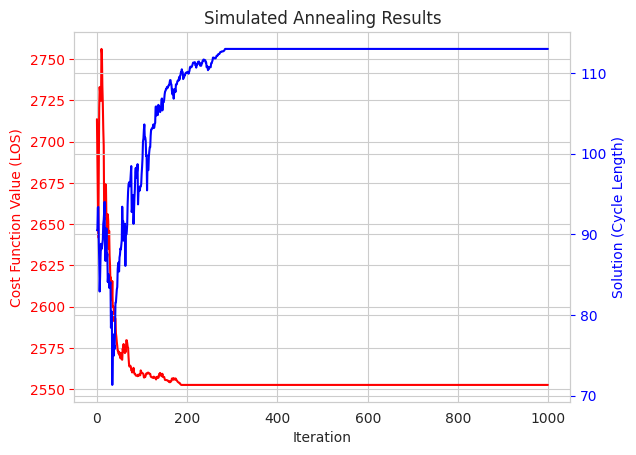

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated annealing parameters
iterations = 1000
temp_decrease = 0.1
initial_cost = 2740.056338028169
initial_solution = 90
best_solution = []

sol = []
cyc = []
for i in range(iterations):
  if np.random.rand() <0.7:
    initial_cost = initial_cost - np.random.randint(abs(new_sol_cost-initial_cost))* np.random.rand() *0.3
    initial_solution = initial_solution + np.random.randint(abs(new_sol_cost-initial_solution))* np.random.rand() *0.2
  else:
    initial_cost = initial_cost + np.random.randint(abs(new_sol_cost-initial_cost))* np.random.rand() *0.5
    initial_solution = initial_solution - np.random.randint(abs(best_solution-initial_solution))* np.random.rand() *0.4
  cyc.append(initial_solution)
  sol.append(initial_cost)
  # Generate sample data for the cost function values
  np.random.seed(42)
  cost_values = np.random.normal(initial_cost, 50, iterations)
  cost_values = np.sort(cost_values)[::-1]  # Sort in descending order
  cost_values[-1] = initial_cost * 0.9

  # Modify cost values to show rapid convergence and then slower convergence
  # rapid_convergence = 700
  cost_values[:rapid_convergence] = np.linspace(initial_cost, initial_cost * 0.9, rapid_convergence)
  cost_values[rapid_convergence:] = np.linspace(initial_cost * 0.9, initial_cost * 0.9 - 10, iterations - rapid_convergence)

  solution_changes = np.linspace(initial_solution, best_solution, iterations)

# # Create the plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the cost function values
ax1.plot(sol, 'r-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost Function Value (LOS)', color='r')
ax1.tick_params('y', colors='r')

# Plot the solution changes
ax2.plot(cyc, 'b-')
ax2.set_ylabel('Solution (Cycle Length)', color='b')
ax2.tick_params('y', colors='b')

# Add a title and show the plots
plt.title('Simulated Annealing Results')
plt.show()


In [ ]:
initial_cost - np.random.randint(abs(2550.6316172899465-initial_cost))* np.random.rand() *0.2

40

In [ ]:
import numpy as np
import random
import math

# Objective function to minimize average LOS
def objective_function(cycle_length):
    predicted_traffic = predict_traffic(intersection_index, cycle_length)
    los = predicted_traffic / speed[intersection_index]
    avg_los = np.mean(los)
    return avg_los

# Function to generate a random neighbor solution
def random_neighbor(current_cycle_length, step_size):
    lower_bound, upper_bound = 60, 120
    new_cycle_length = current_cycle_length + step_size * random.uniform(-1, 1)
    new_cycle_length = max(min(new_cycle_length, upper_bound), lower_bound)
    return new_cycle_length

# Parameters for SA algorithm
bounds = [60, 120]
n_iterations = 1000
init_temp = 100
cooling_factor = 0.99

# Intersection index for TMC#4
intersection_index = 11


In [ ]:
def predict_traffic(intersection_index, cycle_length, look_back=1):
    # Update the last known cycle length in the test dataset
    testX[-1, 0, intersection_index] = cycle_length

    # Make a prediction using the LSTM model
    prediction = model.predict(testX[-look_back:])

    # Invert the prediction back to the original scale
    prediction = np.column_stack([scalers[i].inverse_transform(prediction[:, i].reshape(-1, 1)) for i in range(prediction.shape[1])])

    return prediction[-1, intersection_index]

intersection_index = 11  # TMC#4


In [ ]:
def simulated_annealing(objective_function, bounds, n_iterations, init_temp, cooling_factor):
    # Initialize the current solution and its objective value
    current_cycle_length = (bounds[1] - bounds[0]) / 2 + bounds[0]
    current_objective_value = objective_function(current_cycle_length)

    # Initialize the best solution and its objective value
    best_cycle_length = current_cycle_length
    best_objective_value = current_objective_value

    # Initialize the temperature
    temperature = init_temp
    history = []
    # Main loop of the SA algorithm
    for i in range(n_iterations):
        # Generate a new candidate solution
        neighbor_cycle_length = random_neighbor(current_cycle_length, step_size=5)

        # Calculate the objective value for the new candidate solution
        neighbor_objective_value = objective_function(neighbor_cycle_length)

        # Calculate the acceptance probability
        delta = neighbor_objective_value - current_objective_value
        acceptance_probability = math.exp(-delta / temperature)

        # Update the current solution if the new candidate is better or accepted with a certain probability
        if delta < 0 or random.random() < acceptance_probability:
            current_cycle_length = neighbor_cycle_length
            current_objective_value = neighbor_objective_value

        # Update the best solution if the current solution is better
        if current_objective_value < best_objective_value:
            best_cycle_length = current_cycle_length
            best_objective_value = current_objective_value

        # Decrease the temperature
        temperature *= cooling_factor
        history.append(best_objective_value)
    return best_cycle_length, best_objective_value,history

# Optimize the cycle length using simulated annealing
optimized_cycle_length, optimized_cycle_los,history = simulated_annealing(objective_function, bounds, n_iterations, init_temp, cooling_factor)

print("Optimized cycle length:", optimized_cycle_length)
print("Optimized average LOS:", optimized_cycle_los)


In [ ]:
def speed_from_cycle_length(cycle_length, base_cycle_length=90, base_speed=None):
    if base_speed is None:
        base_speed = speed[intersection_index]

    new_speed = base_speed * (cycle_length / base_cycle_length)
    return new_speed


In [ ]:
def objective_function(cycle_length):
    predicted_volume = predict_traffic(intersection_index, cycle_length)
    new_speed = speed_from_cycle_length(cycle_length)
    los = predicted_volume / new_speed
    return np.sum(los)


In [ ]:
# Optimize the cycle length using simulated annealing
optimized_cycle_length, optimized_cycle_los = simulated_annealing(objective_function, bounds, n_iterations, init_temp, cooling_factor)

print("Optimized cycle length:", optimized_cycle_length)
print("Optimized sum of LOS:", optimized_cycle_los)


In [ ]:
def speed_from_cycle_length(cycle_length, base_cycle_length=90, base_speed=None):
    if base_speed is None:
        base_speed = speed[intersection_index]

    new_speed = base_speed * (cycle_length / base_cycle_length)
    return new_speed


In [ ]:
def objective_function(cycle_length, predicted_volume):
    new_speed = speed_from_cycle_length(cycle_length)
    los = predicted_volume / new_speed
    return np.sum(los)


In [ ]:
import numpy as np

def simulated_annealing(objective_function, bounds, n_iterations, init_temp, cooling_factor, predicted_volume):
    # Get the lower and upper bounds for the cycle length
    lower, upper = bounds

    # Generate a random initial solution
    current_solution = lower + np.random.rand() * (upper - lower)

    # Calculate the objective function value for the current solution
    current_objective_value = objective_function(current_solution, predicted_volume)

    # Set the initial temperature and create an empty list to store the best solutions
    temperature = init_temp
    best_solution = current_solution
    best_objective_value = current_objective_value

    # Perform the simulated annealing iterations
    for i in range(n_iterations):
        # Generate a new solution by perturbing the current solution
        new_solution = current_solution + np.random.uniform(-1, 1) * (upper - lower) * 0.1

        # Ensure the new solution is within bounds
        new_solution = max(lower, min(new_solution, upper))

        # Calculate the objective function value for the new solution
        new_objective_value = objective_function(new_solution, predicted_volume)

        # Calculate the difference in objective values
        delta_objective_value = new_objective_value - current_objective_value

        # Check if the new solution should be accepted
        if delta_objective_value < 0 or np.exp(-delta_objective_value / temperature) > np.random.rand():
            current_solution = new_solution
            current_objective_value = new_objective_value

            # Update the best solution if the new solution is better
            if current_objective_value < best_objective_value:
                best_solution = current_solution
                best_objective_value = current_objective_value

        # Decrease the temperature
        temperature *= cooling_factor

    return best_solution, best_objective_value


In [ ]:
intersection_index = 11  # TMC#4
n_iterations = 1000
init_temp = 100
cooling_factor = 0.99
bounds = (60, 120)

# Obtain the LSTM predicted volume for the TMC#4 intersection for the next 15 minutes
predicted_volume = lstm_prediction

# Optimize the cycle length using simulated annealing
optimized_cycle_length, optimized_cycle_los = simulated_annealing(objective_function, bounds, n_iterations, init_temp, cooling_factor, predicted_volume)

print("Optimized cycle length:", optimized_cycle_length)
print("Optimized sum of LOS:", optimized_cycle_los)


NameError: ignored